## Resonator Fitting 
Luke Wanner, Colorado School of Mines

Based on the resonator fitting scheme in appendix E of Jiansong Gao's Cal Tech thesis. This first fits to the circle and the phase data to find the initial parameters then uses these as initial guesses for the full least-squares fitting. This follws the scheme in Ben Mates' scripts (NIST_resonators_BenMates), with added least squares fitting. 


The two relevent scripts are:

- circle_fitting.py
- resonance_fitting.py

In [1]:

import numpy as np
import scipy as sp
import circle_fitting as cf
import resonance_fitting as rf
import all_resonances as ar
import time
import matplotlib.pyplot as plt
plt.ion()

filename = "../NIST_resonators_BenMates/frsurvey_umux300k_v6_w1_20220825.npz"

###########################################################################################
# When we take a flux-ramp survey we should save at least the following variables:
#   f_wide      : Frequencies in wide VNA sweep (Hz).                           (l)
#   s21_wide    : Complex S21 values from wide VNA sweep.                       (l)
#   fc          : Center frequencies for the flux-ramp survey (Hz).             (n)
#   ibias       : Bias current values applied to the flux-ramp coil (A).        (m)
#   fbias       : Frequency offsets in VNA sweeps for flux-ramp survey (Hz).    (p)
#   s21_fr      : Complex S21 values from flux-ramp survey sweeps.          (n x m x p)
data = np.load(filename)
f_wide = data['f_wide']
s21_wide = data['s21_wide']
fc = data['fc']
ibias = data['ibias']
fbias = data['fbias']
s21_fr = data['s21_fr']
tau = data['tau']

Narrow into one resonator

/Users/lukewanner/miniconda3/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/lukewanner/miniconda3/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


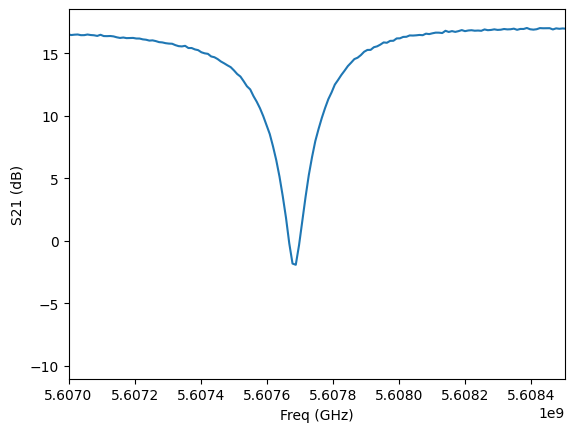

In [2]:
f_min = 5.607e9
f_max = 5.6085e9

plt.plot(f_wide, 20*np.log10(s21_wide))
plt.xlim((f_min, f_max))
plt.ylabel("S21 (dB)")
plt.xlabel("Freq (GHz)")

mask = (f_wide >= f_min) & (f_wide <= f_max)
f_region = f_wide[mask]
s21_region = s21_wide[mask]





In [3]:
print(f_max-f_min)

1500000.0


Fit successful! Resonance Frequency: 5.607703 +/- 0.000001 GHz


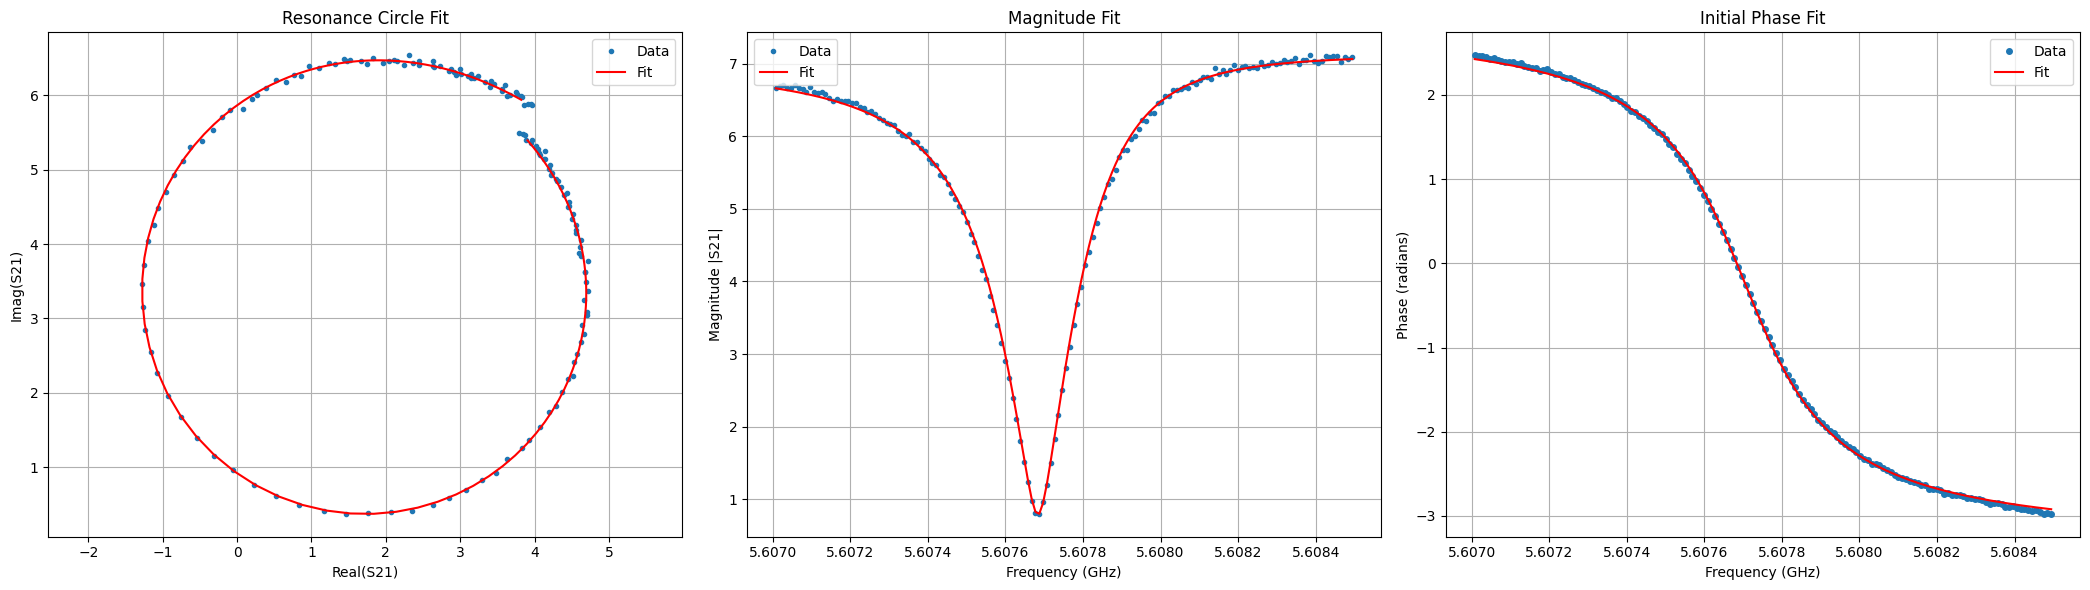

In [4]:

filename = "NIST_resonators_test/"+str(int(f_min))+"_"+str(int(f_max))+"Hz"
a_fine, tau_fine, fr_fine, Qr_fine, Qc_fine, phi0_fine, chi2 = rf.refined_fit(f_region, s21_region, tau, plot_mode='condensed', filename = filename)



Text(0.5, 0, 'Freq (GHz)')

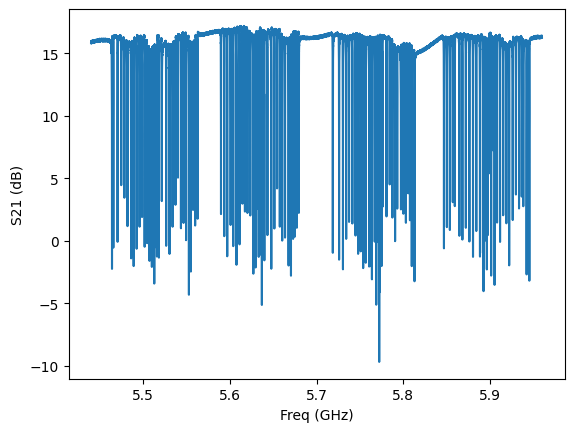

In [6]:
f_start = 5.45e9
f_stop = 5.57e9

f_range = f_stop-f_start

# mask = (f_wide >= f_start) & (f_wide <= f_stop)
# f = f_wide[mask]
# s21 = s21_wide[mask]
f = f_wide
s21 = s21_wide


plt.plot(f*1e-9, 20*np.log10(np.abs(s21)))

plt.ylabel("S21 (dB)")
plt.xlabel("Freq (GHz)")



/Users/lukewanner/miniconda3/lib/python3.13/site-packages/scipy/signal/_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


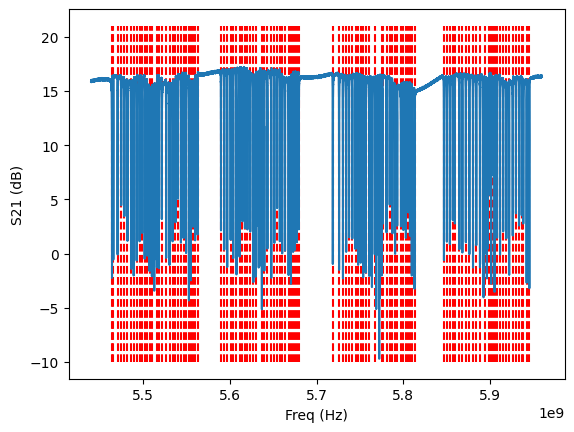

--- Resonator Analysis ---
Number of resonators: 115
Average frequency: 5.7012 GHz
Average spacing (filtered < 10 MHz): 3.43 MHz



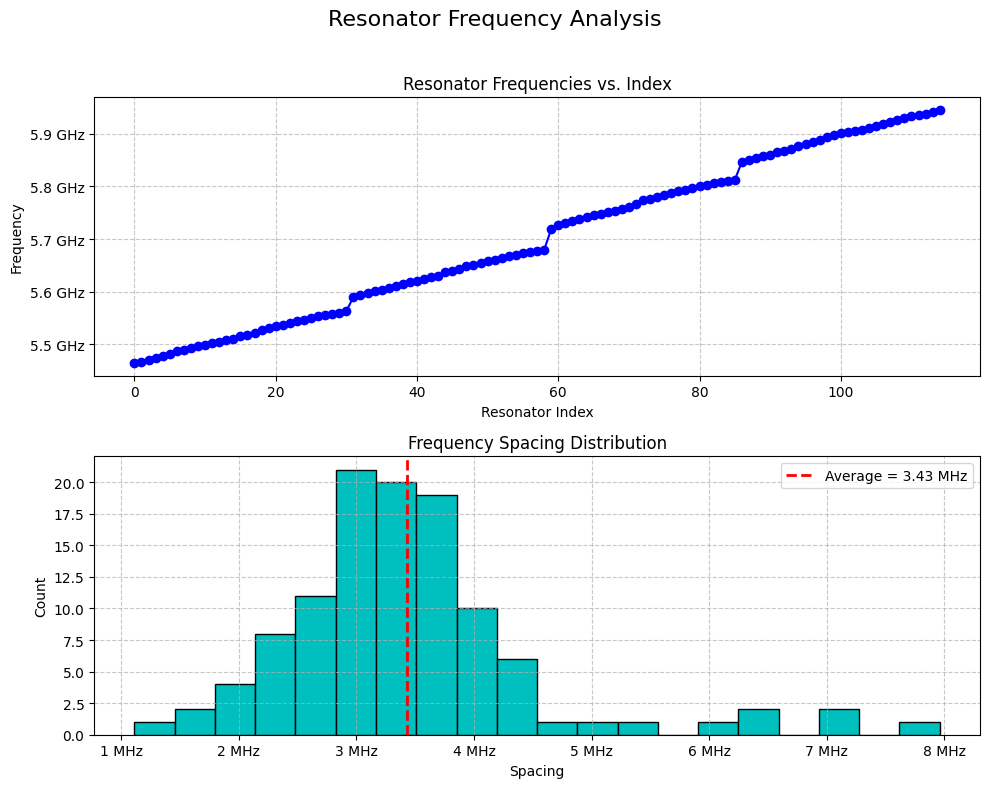

--- Bandwidth Analysis ---
Number of resonators: 115
Average bandwidth: 285.63 kHz


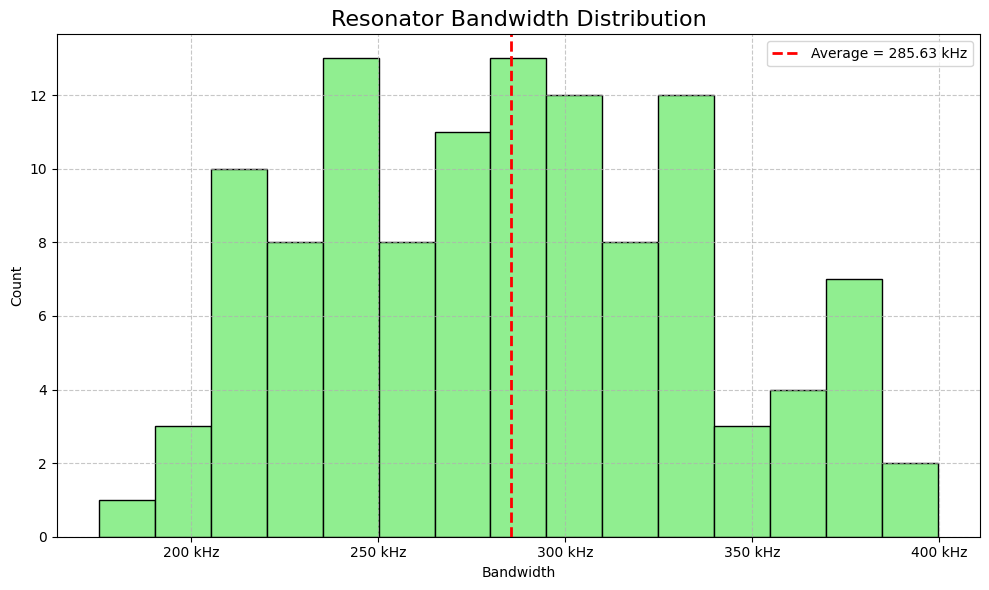

--- Q Factor Analysis ---
Average Coupling Q (Qc): 24,510
Average Internal Q (Qi): 148,963
Average Loaded Q (Qr):   20,651



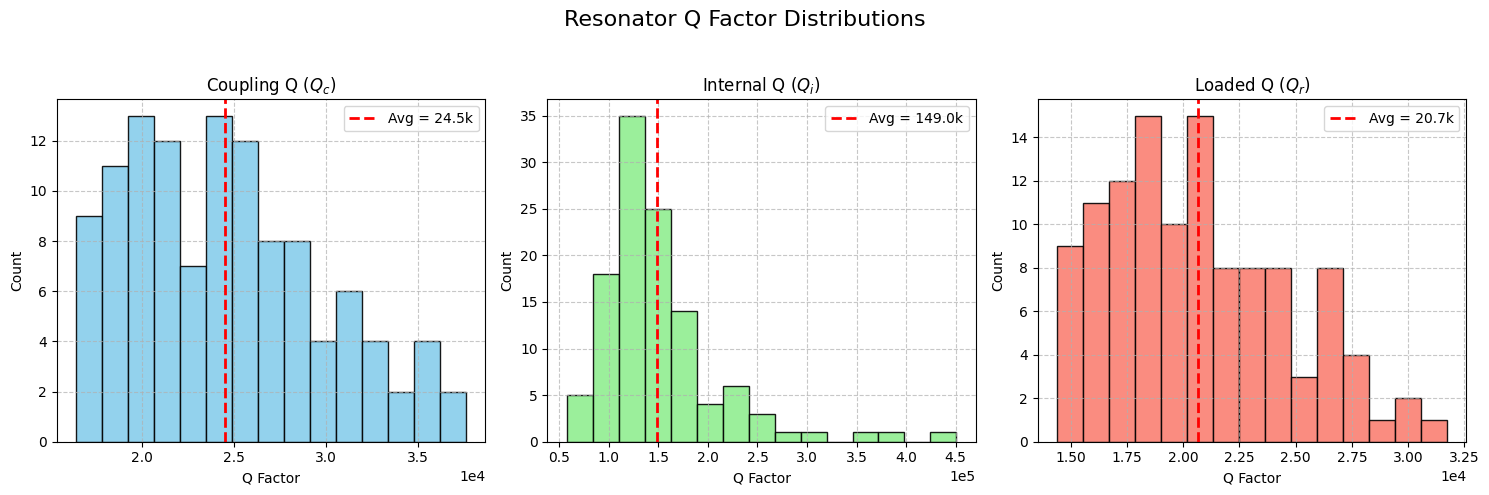

--- Chi-Squared Analysis ---
Number of fits: 115
Average Chi-Squared: 0.32
Std. Dev. of Chi-Squared: 0.69



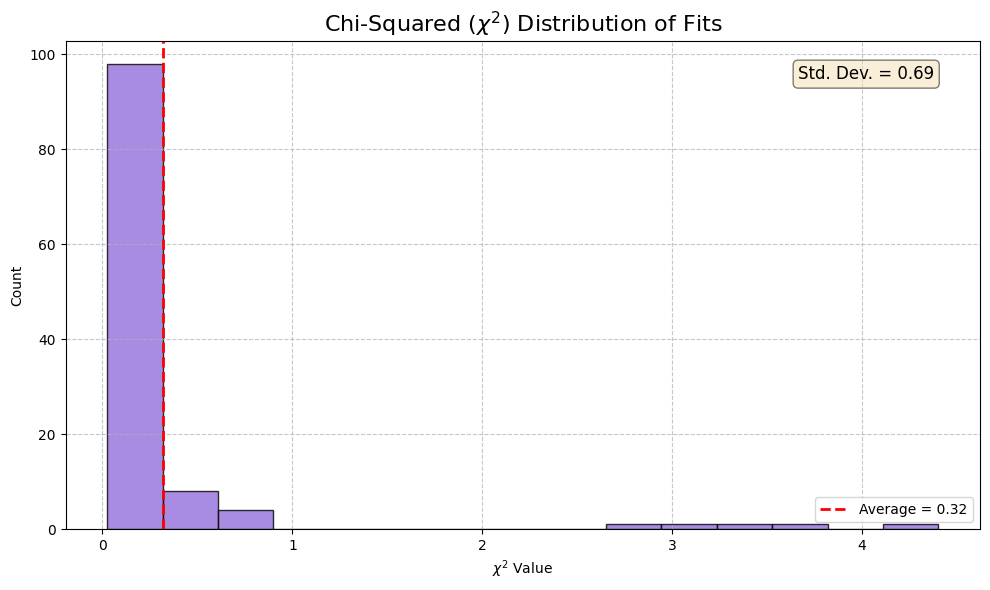

([np.float64(6.338814934768662),
  np.float64(6.517420322853095),
  np.float64(6.512743120869981),
  np.float64(6.459023988175849),
  np.float64(6.385194831788092),
  np.float64(6.257307991371904),
  np.float64(6.219428398852568),
  np.float64(6.327074513392532),
  np.float64(6.394214908295744),
  np.float64(6.4563051925233355),
  np.float64(6.429237423384543),
  np.float64(6.279533930512259),
  np.float64(6.081642745253249),
  np.float64(5.89719375746082),
  np.float64(5.89528119060907),
  np.float64(6.2032087647861145),
  np.float64(6.2627139061179244),
  np.float64(6.14407340970455),
  np.float64(6.064551070375491),
  np.float64(6.058575438955061),
  np.float64(6.12433111381949),
  np.float64(6.295429649219384),
  np.float64(6.494656926620534),
  np.float64(6.588898266727999),
  np.float64(6.581232543342469),
  np.float64(6.481342671564078),
  np.float64(6.36028473751557),
  np.float64(6.239802121143845),
  np.float64(6.264549153681566),
  np.float64(6.419893688093111),
  np.float64

In [7]:
ar.fit_all_resonators(f, s21, tau, showplot=True, filename="NIST_umux_all")